In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install opencv-python
# !pip install scikit-image

In [3]:
import cv2
from skimage.metrics import structural_similarity as ssim

(466, 700, 3)

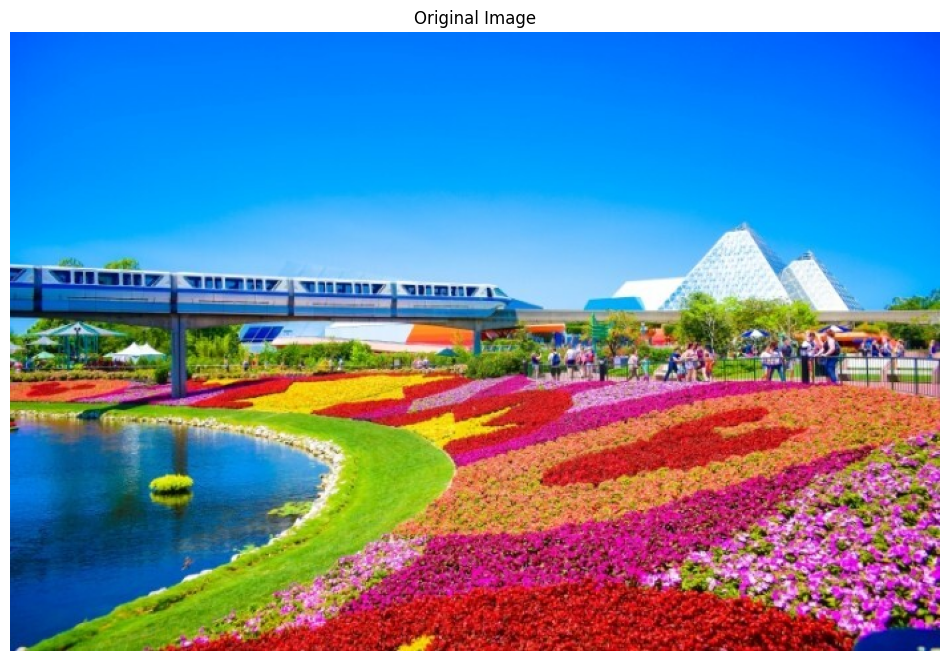

In [4]:
img = cv2.imread('test_image.jpg')
plt.figure(figsize=(12, 10))
plt.axis('off')
b, g, r = cv2.split(img) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])
plt.imshow(new_image)
plt.title('Original Image')
display(new_image.shape)
plt.show()

In [5]:
b, g, r = cv2.split(img)
b.shape, g.shape, r.shape

((466, 700), (466, 700), (466, 700))

In [6]:
pixels = new_image.reshape(-1, 3)
source_img = pixels.reshape(466, 700, 3)
pixels.shape, source_img.shape

((326200, 3), (466, 700, 3))

SSIM: 0.36490150352908984
SSIM: 0.4752703971762255
SSIM: 0.48921958608304017
SSIM: 0.5092212769619255
SSIM: 0.5807216847177843
SSIM: 0.771126283190903


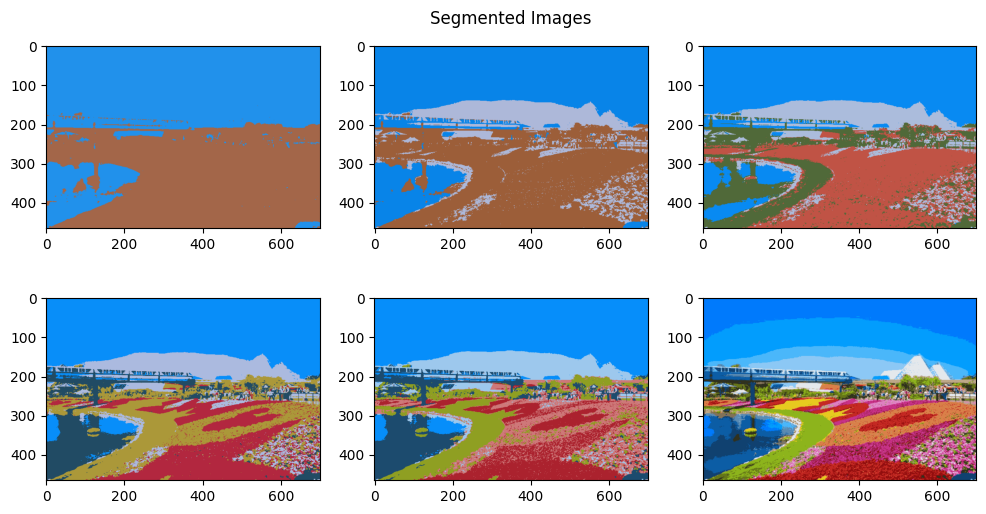

In [7]:
from sklearn.cluster import KMeans

clusters = [2, 3, 4, 5, 6, 20]

plt.figure(figsize=(12, 6))
plt.title('Segmented Images')
plt.axis('off')
for i, k in enumerate(clusters):
    kmeans = KMeans(n_clusters=k, random_state=42, verbose=0)
    kmeans.fit(pixels)
    y_kmeans = kmeans.predict(pixels)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    segmented_pixels = centroids[labels]
    c_img = centroids[labels].reshape(new_image.shape)
    plt.subplot(2, 3, i + 1)
    plt.imshow(c_img.astype(np.uint8))
    print(f"SSIM: {ssim(new_image, c_img.astype(np.uint8), channel_axis=2)}")

plt.show()

(2681,)
SSIM: 0.4193788713948748


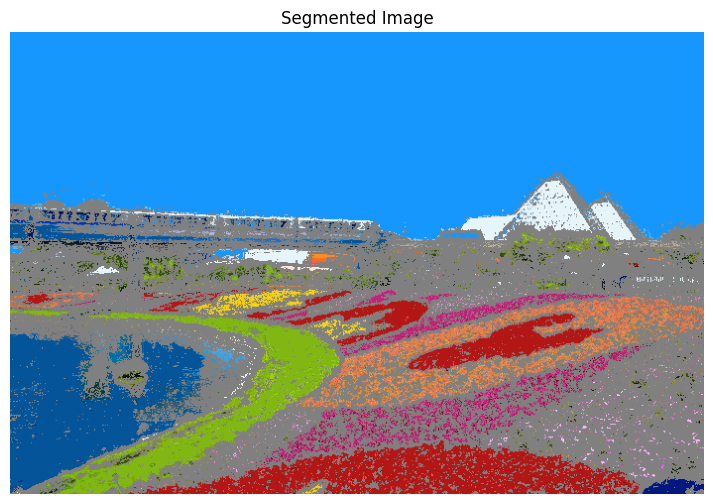

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=5)
clusters = dbscan.fit_predict(pixels)

labels = dbscan.labels_
unique_labels = np.unique(labels[labels != -1])
print(unique_labels.shape)
plt.figure(figsize=(12, 6))
plt.title('Segmented Image')
plt.axis('off')
np.random.seed(42)
segmented_pixels = np.zeros_like(pixels)
for label in unique_labels:
    cluster_pixels = pixels[labels == label]
    mean_color = cluster_pixels.mean(axis=0)
    segmented_pixels[labels == label] = mean_color
segmented_pixels[labels == -1] = [128, 128, 128] 
segmented_pixels = segmented_pixels.reshape(new_image.shape)
plt.imshow(segmented_pixels.astype(np.uint8))
print(f"SSIM: {ssim(new_image, segmented_pixels.astype(np.uint8), channel_axis=2)}")
plt.show()

SSIM: 0.40474087884335014
SSIM: 0.5622030843207474
SSIM: 0.6408444554259312
SSIM: 0.703560449096999
SSIM: 0.8318478570619279
SSIM: 1.0


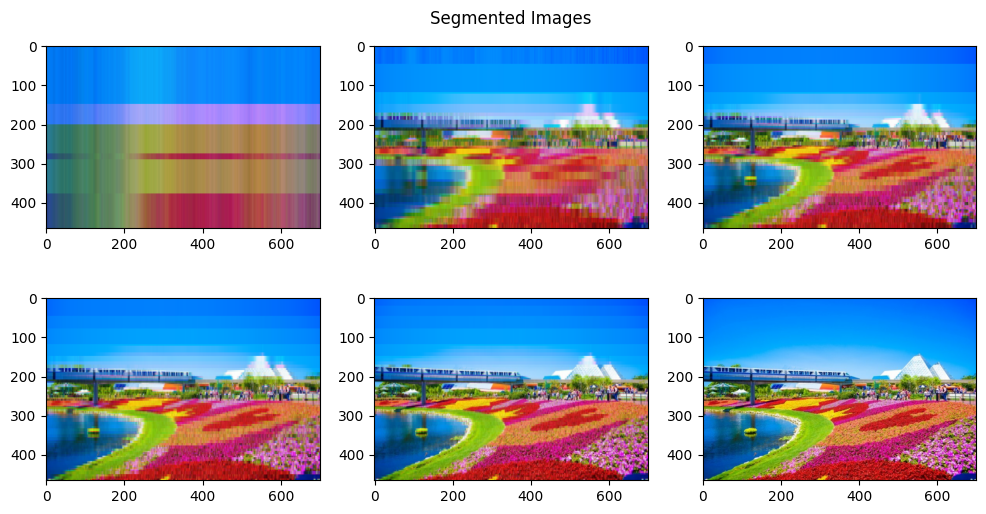

In [9]:
from sklearn.cluster import AgglomerativeClustering

clusters = [2, 20, 35, 50, 100, 466]

plt.figure(figsize=(12, 6))
plt.title('Segmented Images')
plt.axis('off')

def make_seg_by_rgb(c, k_cnt):
    agg = AgglomerativeClustering(n_clusters=k_cnt)
    agg.fit_predict(c)
    unique_labels = np.unique(agg.labels_)
    segmented_pixels = np.zeros_like(c)
    for label in unique_labels:
        cluster_pixels = c[label == agg.labels_]
        mean_color = cluster_pixels.mean(axis=0)
        segmented_pixels[agg.labels_ == label] = mean_color
    return segmented_pixels

for i, k in enumerate(clusters):
    c_img = cv2.merge([make_seg_by_rgb(r, k), make_seg_by_rgb(g, k), make_seg_by_rgb(b, k)])
    plt.subplot(2, 3, i + 1)
    plt.imshow(c_img)
    print(f"SSIM: {ssim(new_image, c_img.astype(np.uint8), channel_axis=2)}")
    
plt.show()